## Sequential Forward Floating Selection (SFS)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector

### Import dataset

In [2]:
df = pd.read_csv("Finaltest.csv")

In [3]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,date_registration,date_unregistration,final_result
0,1,1,24213,0,0,2,4,0,0,90,...,0,0,0,0,0,0,0,-128,-46,0
1,1,1,40419,1,1,1,2,1,0,60,...,4,3,2,1,3,14,10,-46,171,0
2,1,1,41060,1,2,3,7,0,0,60,...,34,2,5,0,22,87,6,-24,0,1
3,1,1,43284,1,1,1,8,0,2,180,...,47,22,9,2,32,87,36,-28,226,0
4,1,1,45664,1,3,3,6,0,1,60,...,27,0,6,2,54,123,64,-31,0,1


### Drop columns

In [4]:
#df=df.drop(columns='id_student')
df=df.drop(columns='code_module')
df=df.drop(columns='code_presentation')
df=df.drop(columns='date_unregistration')
df=df.drop(columns='date_registration')

In [5]:
df.shape

(1303, 23)

In [6]:
df.isnull().sum()

id_student               0
gender                   0
region                   0
highest_education        0
imd_band                 0
age_band                 0
num_of_prev_attempts     0
studied_credits          0
disability               0
total_number_of_click    0
total_score              0
externalquiz             0
forumng                  0
glossary                 0
homepage                 0
oucontent                0
ouelluminate             0
ouwiki                   0
page                     0
resource                 0
subpage                  0
url                      0
final_result             0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url,final_result


In [8]:
X = df.iloc[:,0:22]
y = df.iloc[:,-1]

In [9]:
X

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2693243,0,3,1,5,1,0,60,0,2643,...,310,1,163,31,9,24,1,101,360,200
1299,2694933,0,1,2,1,0,0,60,1,935,...,87,0,76,19,16,14,1,45,81,30
1300,2697773,0,0,2,6,0,0,60,0,148,...,14,0,7,1,0,3,2,6,35,18
1301,2707979,0,1,1,6,0,0,120,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

0       0
1       0
2       1
3       0
4       1
       ..
1298    1
1299    1
1300    1
1301    1
1302    1
Name: final_result, Length: 1303, dtype: int64

In [11]:
X.head()

,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,total_number_of_click,...,forumng,glossary,homepage,oucontent,ouelluminate,ouwiki,page,resource,subpage,url
0,24213,0,0,2,4,0,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40419,1,1,1,2,1,0,60,0,144,...,13,0,9,4,3,2,1,3,14,10
2,41060,1,2,3,7,0,0,60,0,411,...,11,0,33,34,2,5,0,22,87,6
3,43284,1,1,1,8,0,2,180,0,847,...,68,0,91,47,22,9,2,32,87,36
4,45664,1,3,3,6,0,1,60,0,1048,...,45,0,66,27,0,6,2,54,123,64


### Train and Fit dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

### Sequential Forward Floating Selection

In [13]:
from sklearn.svm import SVC

In [14]:
X_train.shape

(912, 22)

In [15]:
forward_feature_selection = SequentialFeatureSelector(SVC(),
                                                     k_features=22,
                                                     forward=True,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)
forward_feature_selection.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    2.7s finished

[2022-11-03 01:31:17] Features: 1/22 -- score: 0.8387872109946313[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.8s finished

[2022-11-03 01:31:19] Features: 2/22 -- score: 0.845467558282427[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_job

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.2s finished

[2022-11-03 01:31:55] Features: 13/22 -- score: 0.8505334346710578[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.3s finished

[2022-11-03 01:31:57] Features: 14/22 -- score: 0.8497273402428533[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

{1: {'feature_idx': (10,),
  'cv_scores': array([0.83653846, 0.8436019 , 0.83018868, 0.83568075, 0.84792627]),
  'avg_score': 0.8387872109946313,
  'feature_names': ('total_score',)},
 2: {'feature_idx': (10, 21),
  'cv_scores': array([0.84651163, 0.8490566 , 0.84259259, 0.85046729, 0.83870968]),
  'avg_score': 0.845467558282427,
  'feature_names': ('total_score', 'url')},
 3: {'feature_idx': (4, 10, 21),
  'cv_scores': array([0.85046729, 0.8490566 , 0.83870968, 0.85581395, 0.83870968]),
  'avg_score': 0.8465514403640586,
  'feature_names': ('imd_band', 'total_score', 'url')},
 4: {'feature_idx': (1, 4, 10, 21),
  'cv_scores': array([0.86111111, 0.8490566 , 0.83870968, 0.85581395, 0.83870968]),
  'avg_score': 0.8486802046423556,
  'feature_names': ('gender', 'imd_band', 'total_score', 'url')},
 5: {'feature_idx': (2, 4, 10, 16, 21),
  'cv_scores': array([0.85446009, 0.8490566 , 0.83870968, 0.85581395, 0.83870968]),
  'avg_score': 0.847350001199476,
  'feature_names': ('region',
   'imd

In [16]:
forward_feature_selection.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

In [17]:
forward_feature_selection.k_feature_names_

('id_student',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'studied_credits',
 'disability',
 'total_number_of_click',
 'total_score',
 'externalquiz',
 'forumng',
 'glossary',
 'homepage',
 'oucontent',
 'ouelluminate',
 'ouwiki',
 'page',
 'resource',
 'subpage',
 'url')

In [18]:
forward_feature_selection.k_score_

0.7880379896298578

In [19]:
download=pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
download.to_csv("forwardfloating.SVM.csv")
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8365384615384615, 0.8436018957345971, 0.830...",0.838787,"(total_score,)",0.008034,0.006251,0.003125
2,"(10, 21)","[0.8465116279069766, 0.8490566037735848, 0.842...",0.845468,"(total_score, url)",0.00554,0.004311,0.002155
3,"(4, 10, 21)","[0.8504672897196262, 0.8490566037735848, 0.838...",0.846551,"(imd_band, total_score, url)",0.008725,0.006788,0.003394
4,"(1, 4, 10, 21)","[0.861111111111111, 0.8490566037735848, 0.8387...",0.84868,"(gender, imd_band, total_score, url)",0.011559,0.008993,0.004497
5,"(2, 4, 10, 16, 21)","[0.8544600938967135, 0.8490566037735848, 0.838...",0.84735,"(region, imd_band, total_score, ouelluminate, ...",0.009522,0.007408,0.003704
6,"(2, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.851...",0.850237,"(region, total_score, externalquiz, oucontent,...",0.007483,0.005822,0.002911
7,"(1, 2, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.847...",0.849451,"(gender, region, total_score, externalquiz, ou...",0.007475,0.005816,0.002908
8,"(1, 2, 4, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.847...",0.849727,"(gender, region, imd_band, total_score, extern...",0.007726,0.006011,0.003006
9,"(1, 2, 3, 4, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.847...",0.849727,"(gender, region, highest_education, imd_band, ...",0.007726,0.006011,0.003006
10,"(1, 2, 3, 4, 5, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.847...",0.849727,"(gender, region, highest_education, imd_band, ...",0.007726,0.006011,0.003006


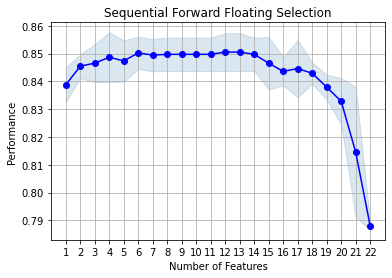

In [20]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Floating Selection')
plt.grid()
plt.show()

In [21]:
forward_feature_selection = SequentialFeatureSelector(SVC(),
                                                     k_features= (1,22),
                                                     forward=True,
                                                     floating=True,
                                                     verbose=2,
                                                     scoring= "f1",
                                                     cv= 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    2.9s finished

[2022-11-03 01:32:28] Features: 1/22 -- score: 0.8387872109946313[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.0s finished

[2022-11-03 01:32:30] Features: 2/22 -- score: 0.845467558282427[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_job

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    1.2s finished

[2022-11-03 01:33:06] Features: 13/22 -- score: 0.8505334346710578[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.3s finished

[2022-11-03 01:33:08] Features: 14/22 -- score: 0.8497273402428533[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: 

In [22]:
forward_feature_selection.k_feature_names_

('gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'num_of_prev_attempts',
 'disability',
 'total_score',
 'externalquiz',
 'glossary',
 'oucontent',
 'url')

In [23]:
forward_feature_selection.k_score_

0.8505334346710578

In [24]:

pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(10,)","[0.8365384615384615, 0.8436018957345971, 0.830...",0.838787,"(total_score,)",0.008034,0.006251,0.003125
2,"(10, 21)","[0.8465116279069766, 0.8490566037735848, 0.842...",0.845468,"(total_score, url)",0.00554,0.004311,0.002155
3,"(4, 10, 21)","[0.8504672897196262, 0.8490566037735848, 0.838...",0.846551,"(imd_band, total_score, url)",0.008725,0.006788,0.003394
4,"(1, 4, 10, 21)","[0.861111111111111, 0.8490566037735848, 0.8387...",0.84868,"(gender, imd_band, total_score, url)",0.011559,0.008993,0.004497
5,"(2, 4, 10, 16, 21)","[0.8544600938967135, 0.8490566037735848, 0.838...",0.84735,"(region, imd_band, total_score, ouelluminate, ...",0.009522,0.007408,0.003704
6,"(2, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.851...",0.850237,"(region, total_score, externalquiz, oucontent,...",0.007483,0.005822,0.002911
7,"(1, 2, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.847...",0.849451,"(gender, region, total_score, externalquiz, ou...",0.007475,0.005816,0.002908
8,"(1, 2, 4, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.847...",0.849727,"(gender, region, imd_band, total_score, extern...",0.007726,0.006011,0.003006
9,"(1, 2, 3, 4, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.847...",0.849727,"(gender, region, highest_education, imd_band, ...",0.007726,0.006011,0.003006
10,"(1, 2, 3, 4, 5, 10, 11, 15, 16, 21)","[0.8544600938967135, 0.8530805687203792, 0.847...",0.849727,"(gender, region, highest_education, imd_band, ...",0.007726,0.006011,0.003006


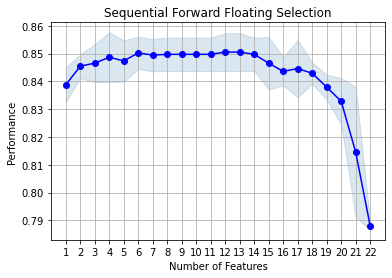

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(forward_feature_selection.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Floating Selection')
plt.grid()
plt.show()